## EDA OF THE FINAL PROJECT

In [61]:
import os
import numpy as np
import pandas as pd
import platform
import pickle
from pathlib import Path

import matplotlib.pyplot as plt
%matplotlib inline

In [62]:
import datetime

In [63]:
%qtconsole

In [64]:
if platform.system() == 'Linux':
    data_dir = '/home/alin/Data/DS_Competition'
else:
    data_dir = 'C:/Users/alin/Documents/Data/DS_Competition'

### Load Data

In [65]:
item_categories = pd.read_csv(data_dir + '/item_categories.csv')
items = pd.read_csv(data_dir + '/items.csv')
shops = pd.read_csv(data_dir + '/shops.csv')

In [66]:
sales_train_dump = data_dir + '/sales_train.p'
if Path(sales_train_dump).is_file():
    print('load previous dump')
    sales_train = pickle.load(open(sales_train_dump, 'rb'))
else:
    print('load from original csv')
    sales_train = pd.read_csv(data_dir + '/sales_train.csv')
    sales_train['year'] = sales_train.apply(lambda r: int(r['date'][6:]), axis=1)
    sales_train['month'] = sales_train.apply(lambda r: int(r['date'][3:5]), axis=1)
    sales_train['day'] = sales_train.apply(lambda r: int(r['date'][:2]), axis=1)
    sales_train['year_month'] = sales_train.apply(lambda r: r['year']*100 + r['month'], axis=1)
    sales_train['weekday'] = sales_train.apply(lambda r: datetime.datetime(r['year'], r['month'], r['day']).weekday() + 1, axis=1)
    sales_train['transaction'] = 1
    sales_train['money'] = sales_train.apply(lambda r: r['item_price'] * r['item_cnt_day'], axis=1)
    sales_train = sales_train.join(items, on='item_id', how='inner', rsuffix='_r')
    sales_train = sales_train.drop(['item_id_r', 'item_name'], axis=1)
    sales_train['weekend'] = sales_train.apply(lambda r: 1 if r['weekday'] >= 6 else 0, axis=1)
    pickle.dump(sales_train, open(sales_train_dump, 'wb'))

load previous dump


In [7]:
sales_train.shape

(2935849, 14)

In [8]:
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,year,month,day,year_month,weekday,transaction,money,item_category_id
0,02.01.2013,0,59,22154,999.0,1.0,2013,1,2,201301,3,1,999.0,37
3270,23.01.2013,0,24,22154,999.0,1.0,2013,1,23,201301,3,1,999.0,37
17081,20.01.2013,0,27,22154,999.0,1.0,2013,1,20,201301,7,1,999.0,37
25918,02.01.2013,0,25,22154,999.0,1.0,2013,1,2,201301,3,1,999.0,37
25919,03.01.2013,0,25,22154,999.0,1.0,2013,1,3,201301,4,1,999.0,37


### Check Missing Values

#### No missing value

In [9]:
sales_train.isnull().sum(axis=0)

date                0
date_block_num      0
shop_id             0
item_id             0
item_price          0
item_cnt_day        0
year                0
month               0
day                 0
year_month          0
weekday             0
transaction         0
money               0
item_category_id    0
dtype: int64

#### Year

In [10]:
sales_train.year.value_counts()

2013    1267562
2014    1055861
2015     612426
Name: year, dtype: int64

In [11]:
def by_year_month(shop=None, item=None, item_category=None, target='item_cnt_day'):
    if shop:
        df = sales_train[sales_train['shop_id'] == shop]
    else:
        df = sales_train
    if item:
        df = df[df['item_id'] == item]
    if item_category:
        df = df[df['item_category_id'] == item_category]
   
    if df.shape[0] == 0:
        print('Empty!')
        return df
    df3 = df.groupby(by=['year_month']).sum()[target]
    df3 = df3.reset_index()
    df3['month'] = df3.apply(lambda r: r['year_month'] - int(r['year_month']/100)*100, axis=1)
    df2013 = df3[df3['year_month'] < 201401]
    df2014 = df3[(df3['year_month'] > 201312) & (df3['year_month'] < 201501) ]
    df2015 = df3[df3['year_month'] > 201412]
    plt.plot(df2013['month'], df2013[target], 'r-x', label='2013')
    plt.plot(df2014['month'], df2014[target], 'b-x', label='2014')
    plt.plot(df2015['month'], df2015[target], 'g-x', label='2015')
    plt.legend()
    return df

### Number of total transactions going down by year, yearly patterns are similar

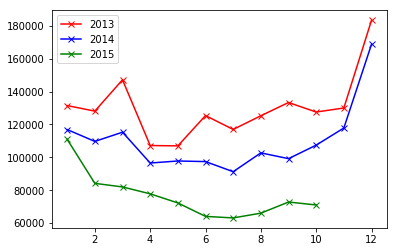

In [12]:
df = by_year_month()

### Number of total item counts

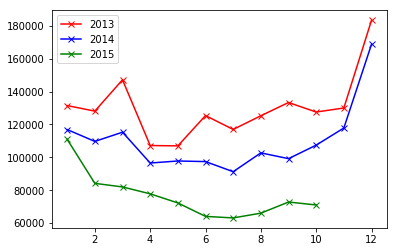

In [13]:
df = by_year_month(target='item_cnt_day')

### Total money

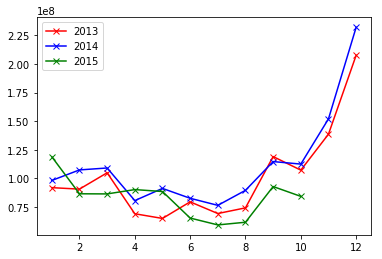

In [14]:
df = by_year_month(target='money')

### Check out a few shops with all items

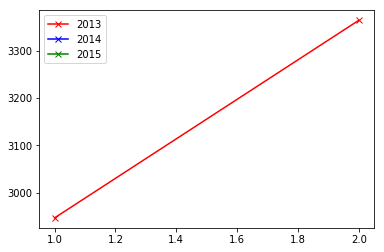

In [15]:
df = by_year_month(shop=1, target='item_cnt_day')

### Some shops (e.g. 1) only appeared in the first a few months, their prediction should be 0

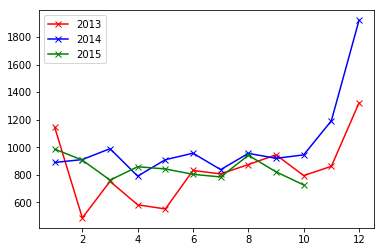

In [16]:
df = by_year_month(shop=2)

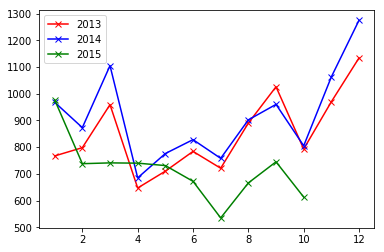

In [17]:
df = by_year_month(shop=3, target='item_cnt_day')

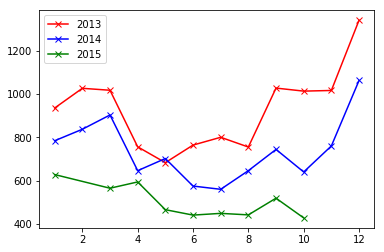

In [18]:
df = by_year_month(shop=10, target='item_cnt_day')

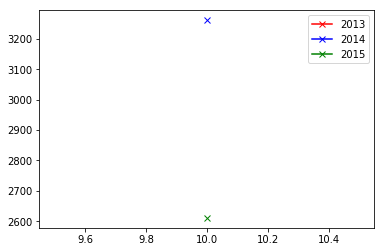

In [19]:
df = by_year_month(shop=20, target='item_cnt_day')

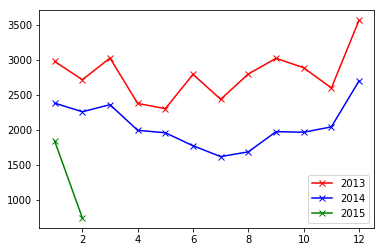

In [20]:
df = by_year_month(shop=30, target='item_cnt_day')

### By shop and item

In [21]:
df = by_year_month(shop=25, item=2, target='item_cnt_day')

Empty!


In [22]:
df = by_year_month(shop=5, item=20, target='item_cnt_day')

Empty!


In [23]:
df = by_year_month(shop=25, item=12, target='item_cnt_day')

Empty!


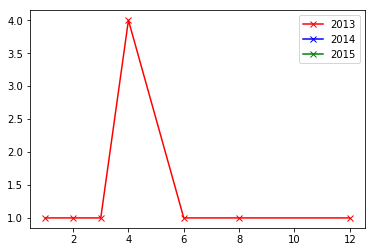

In [24]:
df = by_year_month(shop=25, item=2555, target='item_cnt_day')

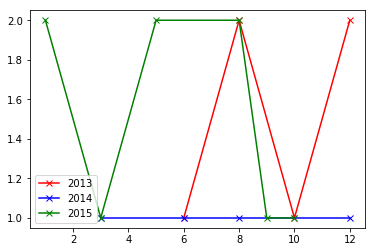

In [25]:
df = by_year_month(shop=25, item=19045, target='item_cnt_day')

### It seems that shop + item has too much variability,  try shop + item category

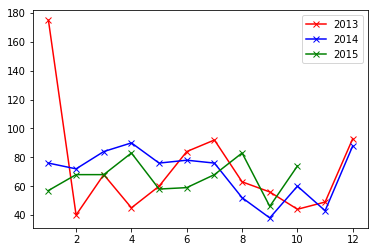

In [26]:
df = by_year_month(shop=2, item_category=40)

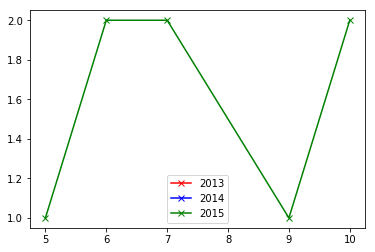

In [27]:
df = by_year_month(shop=3, item_category=42)

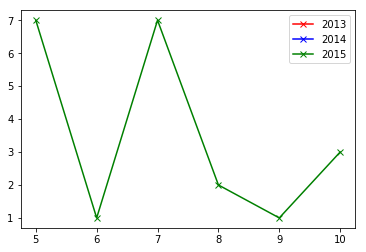

In [28]:
df = by_year_month(shop=4, item_category=42)

### check whether items in the same category has similar price

In [30]:
a = sales_train.groupby(by = ['shop_id', 'year_month', 'item_id']).sum()

In [31]:
type(a)

pandas.core.frame.DataFrame

### First Idea: Build one model for each category.

In [35]:
from sklearn.base import BaseEstimator, TransformerMixin

In [76]:
class Category_filter(BaseEstimator, TransformerMixin):
    def __init__(self, category):
        self.category = category
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        X = X[X['item_category_id'] == self.category][['shop_id', 'item_id', 'item_cnt_day',
                                                      'year_month', 'weekend', 'money']]
        X = X.groupby(by = ['shop_id', 'year_month', 'item_id']).sum()
        return X

In [77]:
cf = Category_filter(40)

In [78]:
X = cf.fit_transform(sales_train)

In [79]:
X.shape

(336088, 3)

In [80]:
X.head()

item_cnt_day  weekend   money
shop_id year_month item_id                               
0       201301     32                6.0        0  1326.0
                   35                1.0        0   247.0
                   43                1.0        0   221.0
                   75                1.0        0    76.0
                   88                1.0        0    76.0

In [52]:
X.head()

,shop_id,item_id,item_price,item_cnt_day,year,month,year_month,weekday,money
186,25,2462,99.0,1.0,2013,1,201301,3,99.0
10151,19,2462,99.0,1.0,2013,1,201301,7,99.0
40240,0,2462,58.0,1.0,2013,1,201301,6,58.0
51686,18,2462,99.0,1.0,2013,1,201301,6,99.0
55746,8,2462,99.0,1.0,2013,1,201301,1,99.0
